# 과제

OECD 삶의 만족도 데이터와 IMF 1인당 GDP 데이터를 활용하여 연관성 찾기

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [158]:
import os
from pathlib import Path

MAIN_DIR = Path(os.getcwd()).resolve().parent.parent
print("Main Directory : ", MAIN_DIR)

CHAPTER_ID = "ch_01"
GRAPH_ROOT_DIR = Path.joinpath(MAIN_DIR, "data", "graphs", CHAPTER_ID)
DATA_ROOT_DIR = Path.joinpath(MAIN_DIR, "data", "lifesat")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = Path.joinpath(GRAPH_ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)

    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Main Directory :  /Users/kjs/Desktop/hands_on_ml


In [7]:
np.random.seed(42)

In [12]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 20.8 MB/s eta 0:00:00


In [68]:
gdp_per_capita = pd.read_excel(
    DATA_ROOT_DIR.joinpath("gdp_per_capita_2020.xlsx"),
    thousands=',',
    na_values="n/a"
)

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0
...,...,...,...,...,...,...,...
192,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",645.126,2019.0
193,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1001.440,2018.0
194,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",921.847,2017.0
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
gdp_per_capita = gdp_per_capita.dropna(axis=0)

gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0
...,...,...,...,...,...,...,...
190,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3497.512,2019.0
191,West Bank and Gaza,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2894.069,2019.0
192,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",645.126,2019.0
193,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1001.440,2018.0


In [70]:

gdp_per_capita_c = gdp_per_capita.set_index("Country")

gdp_per_capita_c.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0


In [71]:
gdp_per_capita_c.rename(columns={"2020" : 2020}, inplace=True)

gdp_per_capita_c.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2020,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0


In [99]:
oecd_bli = pd.read_csv(
    DATA_ROOT_DIR.joinpath("oecd_bli_2020.csv"), 
    thousands=",", 
    na_values="n/a")

oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [97]:
# oecd_bli_T = oecd_bli.dropna(axis=0)

# oecd_bli_T

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags


In [100]:
oecd_bli.LOCATION.unique().shape

(41,)

In [88]:
oecd_bli.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [89]:
oecd_bli.Indicator.unique().shape

(24,)

In [90]:
oecd_bli.Indicator.shape

(2369,)

In [91]:
'Life satisfaction' in oecd_bli.Indicator.unique()

True

In [92]:
mask = oecd_bli.Indicator == 'Life satisfaction'

oecd_bli[mask].shape

(168, 17)

In [93]:
oecd_bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

In [94]:
ineq_arr = oecd_bli.INEQUALITY.unique()
print(ineq_arr)

sum = 0
for ineq in ineq_arr:
    num_lines = (oecd_bli['INEQUALITY'] == ineq).sum()
    sum += num_lines
    print(f"{ineq:>3}:\t{num_lines}행")

print(f"\n 총: \t{sum}행")

['TOT' 'MN' 'WMN' 'HGH' 'LW']
TOT:	911행
 MN:	578행
WMN:	578행
HGH:	164행
 LW:	138행

 총: 	2369행


In [103]:
oecd_bli_T = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

oecd_bli_T.shape

(911, 17)

In [108]:
oecd_bli_p = oecd_bli_T.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli_p

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [110]:
oecd_bli_p.loc['Korea']

Indicator
Air pollution                                            28.00
Dwellings without basic facilities                        2.50
Educational attainment                                   88.00
Employees working very long hours                          NaN
Employment rate                                          67.00
Feeling safe walking alone at night                      66.60
Homicide rate                                             1.00
Household net adjusted disposable income              21882.00
Household net wealth                                 285980.00
Housing expenditure                                      15.00
Labour market insecurity                                  2.60
Life expectancy                                          82.40
Life satisfaction                                         5.90
Long-term unemployment rate                               0.05
Personal earnings                                     35191.00
Quality of support network                   

In [111]:
oecd_bli_p["Life satisfaction"]

Country
Australia          7.3
Austria            7.1
Belgium            6.9
Brazil             6.4
Canada             7.4
Chile              6.5
Colombia           6.3
Czech Republic     6.7
Denmark            7.6
Estonia            5.7
Finland            7.6
France             6.5
Germany            7.0
Greece             5.4
Hungary            5.6
Iceland            7.5
Ireland            7.0
Israel             7.2
Italy              6.0
Japan              5.9
Korea              5.9
Latvia             5.9
Lithuania          5.9
Luxembourg         6.9
Mexico             6.5
Netherlands        7.4
New Zealand        7.3
Norway             7.6
OECD - Total       6.5
Poland             6.1
Portugal           5.4
Russia             5.8
Slovak Republic    6.2
Slovenia           5.9
South Africa       4.7
Spain              6.3
Sweden             7.3
Switzerland        7.5
Turkey             5.5
United Kingdom     6.8
United States      6.9
Name: Life satisfaction, dtype: float64

In [113]:
oecd_country_stats = pd.merge(left=gdp_per_capita_c[2020],
                              right=oecd_bli_p['Life satisfaction'],
                              left_index=True, right_index=True)

oecd_country_stats

,2020,Life satisfaction
Country,,
Australia,51885.466,7.3
Austria,48634.336,7.1
Belgium,43813.770,6.9
Brazil,6450.451,6.4
Canada,42080.050,7.4
Chile,12612.322,6.5
Colombia,5207.238,6.3
Czech Republic,22627.469,6.7
Denmark,58438.845,7.6


In [115]:
oecd_country_stats.sort_values(by=2020, inplace=True)

oecd_country_stats

,2020,Life satisfaction
Country,,
South Africa,4735.747,4.7
Colombia,5207.238,6.3
Brazil,6450.451,6.4
Turkey,7715.373,5.5
Mexico,8069.104,6.5
Russia,9972.495,5.8
Chile,12612.322,6.5
Poland,15303.544,6.1
Hungary,15372.885,5.6


In [116]:
remove_indices = [1, 2, 4, 6, 37, 38, 39]
keep_indices = list(set(range(40)) - set(remove_indices))

keep_indices

[0,
 3,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [117]:
missing_data = oecd_country_stats.iloc[remove_indices]

missing_data

,2020,Life satisfaction
Country,,
Colombia,5207.238,6.3
Brazil,6450.451,6.4
Mexico,8069.104,6.5
Chile,12612.322,6.5
Ireland,79668.502,7.0
Switzerland,81867.462,7.5
Luxembourg,109602.322,6.9


In [118]:
sample_data = oecd_country_stats.iloc[keep_indices]

sample_data

,2020,Life satisfaction
Country,,
South Africa,4735.747,4.7
Turkey,7715.373,5.5
Russia,9972.495,5.8
Poland,15303.544,6.1
Hungary,15372.885,5.6
Latvia,17230.136,5.9
Greece,18168.338,5.4
Slovak Republic,18669.295,6.2
Lithuania,19883.066,5.9


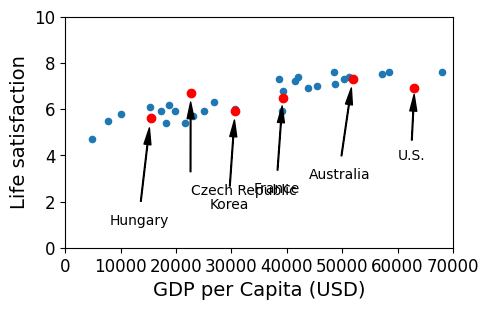

In [150]:
sample_data.plot(kind='scatter', x=2020, y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 70000, 0, 10])

position_text = {
        "Hungary": (8000, 1),
        "Korea": (26000, 1.7),
        "Czech Republic": (22600, 2.3),
        "France": (34000, 2.4),
        "Australia": (44000, 3.0),
        "United States": (60000, 3.8),
    }

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    
    country = "U.S." if country == "United States" else country

    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel("GDP per Capita (USD)")
plt.show()

In [120]:
from sklearn import linear_model

lin_1 = linear_model.LinearRegression()

Xsample = np.c_[sample_data[2020]]
ysample = np.c_[sample_data["Life satisfaction"]]

In [121]:
sample_data[2020].shape

(33,)

In [122]:
lin_1.fit(Xsample, ysample)

LinearRegression()

In [123]:
t0, t1 = lin_1.intercept_[0], lin_1.coef_[0][0]

print(f"절편 : \t {t0}")
print(f"기울기 : \t {t1}")

절편 : 	 5.071121853750363
기울기 : 	 4.141017742413671e-05


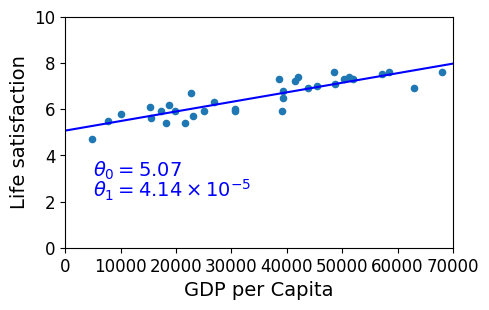

In [133]:
sample_data.plot(kind='scatter', x=2020, y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per Capita")
plt.axis([0, 70000, 0, 10])

X = np.linspace(0, 70000, 100)
plt.plot(X, t0 + t1 * X, "b")

plt.text(5000, 3.1, r"$\theta_0 = 5.07$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.14 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

In [126]:
missing_data

,2020,Life satisfaction
Country,,
Colombia,5207.238,6.3
Brazil,6450.451,6.4
Mexico,8069.104,6.5
Chile,12612.322,6.5
Ireland,79668.502,7.0
Switzerland,81867.462,7.5
Luxembourg,109602.322,6.9


In [151]:
position_text2 = {
    "Colombia":	(800, 9.0),
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Ireland": (70000, 3.0),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

In [152]:
for country, pos_text in position_text2.items():
    print(country, pos_text)
    print(missing_data.loc[country])

Colombia (800, 9.0)
2020                 5207.238
Life satisfaction       6.300
Name: Colombia, dtype: float64
Brazil (1000, 9.0)
2020                 6450.451
Life satisfaction       6.400
Name: Brazil, dtype: float64
Mexico (11000, 9.0)
2020                 8069.104
Life satisfaction       6.500
Name: Mexico, dtype: float64
Chile (25000, 9.0)
2020                 12612.322
Life satisfaction        6.500
Name: Chile, dtype: float64
Ireland (70000, 3.0)
2020                 79668.502
Life satisfaction        7.000
Name: Ireland, dtype: float64
Switzerland (72000, 3.0)
2020                 81867.462
Life satisfaction        7.500
Name: Switzerland, dtype: float64
Luxembourg (90000, 3.0)
2020                 109602.322
Life satisfaction         6.900
Name: Luxembourg, dtype: float64


Colombia (800, 9.0)
2020                 5207.238
Life satisfaction       6.300
Name: Colombia, dtype: float64
5207.238 6.3
Brazil (1000, 9.0)
2020                 6450.451
Life satisfaction       6.400
Name: Brazil, dtype: float64
6450.451 6.4
Mexico (11000, 9.0)
2020                 8069.104
Life satisfaction       6.500
Name: Mexico, dtype: float64
8069.104 6.5
Chile (25000, 9.0)
2020                 12612.322
Life satisfaction        6.500
Name: Chile, dtype: float64
12612.322 6.5
Ireland (70000, 3.0)
2020                 79668.502
Life satisfaction        7.000
Name: Ireland, dtype: float64
79668.502 7.0
Switzerland (72000, 3.0)
2020                 81867.462
Life satisfaction        7.500
Name: Switzerland, dtype: float64
81867.462 7.5
Luxembourg (90000, 3.0)
2020                 109602.322
Life satisfaction         6.900
Name: Luxembourg, dtype: float64
109602.322 6.9


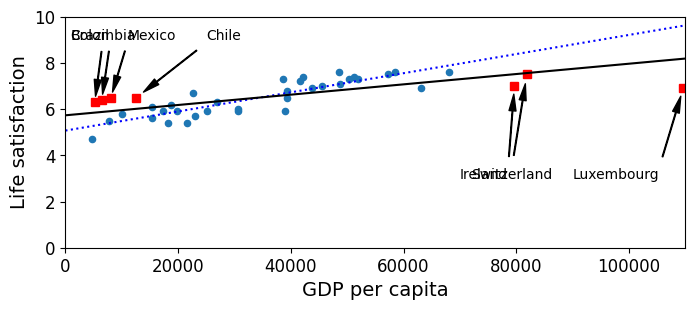

In [159]:
sample_data.plot(kind='scatter', x=2020, y="Life satisfaction", figsize=(8, 3))
plt.axis([0 ,110000, 0, 10])

for country, pos_text in position_text2.items():
    print(country, pos_text)
    print(missing_data.loc[country])
    pos_data_x, pos_data_y = missing_data.loc[country]
    print(pos_data_x, pos_data_y)
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[oecd_country_stats[2020]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita")

plt.show()

In [154]:
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[oecd_country_stats[2020]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)


LinearRegression()

Saving Figure ridge_model_plot_hw


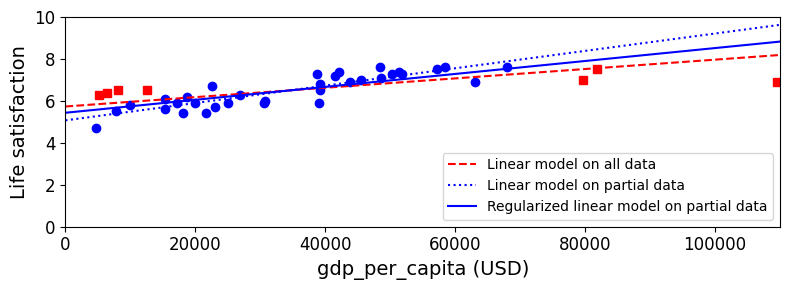

In [160]:
plt.figure(figsize=(8, 3))

plt.xlabel("GDP per Capita")
plt.ylabel("Life satisfaction")

# 7개 국가 제외 데이터 산점도
plt.plot(list(sample_data[2020]), list(sample_data["Life satisfaction"]), "bo")
# 제외 국가 산점도
plt.plot(list(missing_data[2020]), list(missing_data["Life satisfaction"]), "rs")

# 7개 국가 포함 예측 선형 모델 그래프
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
# 7개 국가 제외 예측 선형 모델 그래프
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

# 릿지(Ridge) 규제 적용 훈련 : 7개 국가 제외 데이터 대상
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data[2020]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
# 릿지 규제 적용 예측 선형 모델 그래프
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc='lower right')
plt.axis([0, 110000, 0, 10])
plt.xlabel("gdp_per_capita (USD)")
save_fig('ridge_model_plot_hw')
plt.show()

1. 머신러닝을 어떻게 정의할 수 있나요?
- 데이터로부터 학습할 수 있는 시스템을 만드는 것

2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지를 말해보세요.
- 복잡한 문제, 환경 적응 문제, 사람에게 통찰을 제공, 수작업 대체

3. 레이블된 훈련 세트란 무엇인가요?
- 지도 학습 시 훈련을 위해 사용되는 데이터로 데이터의 내용과 정답을 같이 제공하는 데이터 세트

4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?
- 회귀, 분류

5. 보편적인 비지도 학습 작업 네 가지는 무엇인가요?
- 군집, 시각화, 차원축소, 연관 규칙 학습

6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?
- 강화 학습

7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?
- 클러스터링

8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나요?
- 지도 학습

9. 온라인 학습 시스템이 무엇인가요?
- 데이터를 순차적으로 혹은 미니배치라는 단위로 모델을 훈련시키는 것

10. 외부 메모리 학습이 무엇인가요?
- 대용량 데이터를 다루기 위해 데이터를 미니배치 단위로 나누어 온라인 학습 기법을 사용해 학습

11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요? 
- 사례 기반 학습, 훈련 데이터를 기억하는 학습 알고리즘

12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터 사이에는 어떤 차이가 있나요?
- 모델 파라미터는 모델이 데이터에 맞게 학습하며 정해지는 파라미터, 하이퍼 파라미터는 모델이 데이터에 성공적으로 일반화되기 위해 설정할 수 있는 파라미터

13. 모델 기반 알고리즘이 찾는 것은 무엇인가요? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 예측은 어떻게 만드나요? 
- 샘플 외의 데이터를 통해 원하는 방향으로 예측하도록 하는 것, 

14. 머신러닝의 주요 도전 과제는 무엇인가요?
- 나쁜 알고리즘, 데이터

15. 모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 가능한 해결책 세 가지는 무엇인가요?
- 훈련 데이터에 지나치게 일반화되어 있는 과적합 현상, 훈련 데이터의 양을 늘리거나, 모델 파라미터의 수를 줄이고, 훈련 데이터의 이상치 및 결측치 등의 유무를 확인 

16. 테스트 세트가 무엇이고 왜 사용해야 하나요?
- 훈련 데이터를 통해 모델을 최종 평가, 테스트하는 목적으로 사용, 학습된 모델에 새로운 데이터를 입력하였을 때 일반화 과정에서의 오차를 확인하여 모델을 평가

17. 검증 세트의 목적은 무엇인가요?
- 모델이 훈련되는 과정에서 사용되며 검증 세트를 통해 높은 성능을 내는 모델을 선택, 비교하기 위함

18. 훈련-개발 세트가 무엇인가요? 언제 필요하고 어떻게 사용해야 하나요?
- 훈련 데이터에서 어느 정도의 데이트를 분리하여 검증하는 목적으로 사용, 훈련 데이터에 과적합을 판단하거나, 검증 데이터의 문제를 파악할 수 있음

19. 테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기나요?
- 테스트 세트에 과적합 될 가능성이 있다. 실제 서비스 시에 문제 발생 가능성 제기